- *Context*:
<br><br> There was a property agency called *"**Korea Real Estate Agency (KREA)**"*. Their main business is connecting buyers, sellers, tenants, and investors, and ensuring smooth and efficient properties transactions in South Korea.
<br><br> In the beginning of 2024, KREA noticed a sharp decline in their apartment sales. Apartments were sitting on the market for months without buyers, and when they did sell, it was often at a much lower price than anticipated. Market trends were shifting rapidly, and traditional pricing strategies that once worked were now falling short. Potential buyers were more informed than ever, often using online tools to compare prices, locations, and amenities. KREA's outdated methods were not keeping up.
<br><br> As a member of Data Scientist division on the company, I've been asked to solve this problem. Therefore, I proposed the company to develop a machine learning model that can predict apartment prices with greater accuracy, ensuring they were competitively priced and attractive to potential buyers.

# **Daegu Apartement Price Prediction Tools**
****

## **I. Business Problem Understanding**

### **1.1 Problem Statement**

The apartment prices in South Korea have been declining for 11 consecutive weeks since the end of 2023. According to the "National Weekly Apartment Price Trend" released by the **Korea Real Estate Agency**, apartment prices across the country fell 0.06%. The price drop was particularly noticeable in Daegu (-0.16%) due to **the increase in unsold apartments**. On a cumulative basis in 2024, apartment prices in Daegu fell 0.6%, significantly exceeding the national average (-0.31%). In the case of Daegu, which is called the "unsold grave," **the stagnation of sales** is pointed out as the reason for the decline.

[(Source: Maeil Business Newspaper)](https://www.mk.co.kr/en/realestate/10939650)

![Korean Apart Price Fell 2024.jpg](<attachment:Korean Apart Price Fell 2024.jpg>)
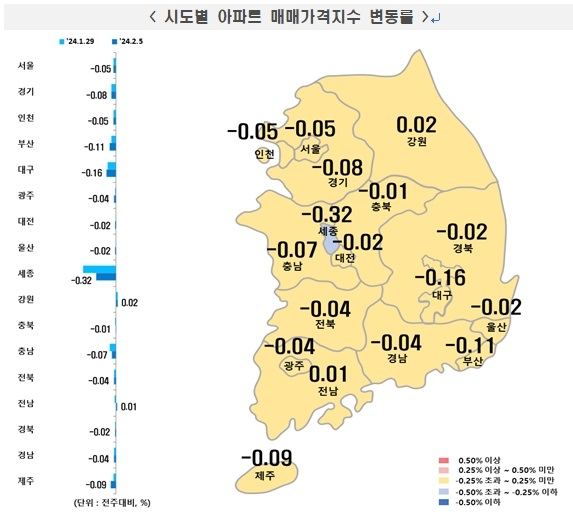

However, **determining apartment prices can be challenging due to the increasing complexity of influencing factors and the limitations of traditional pricing methods**. Individuals or companies often make offers on apartment units, but it's difficult for owners to set competitive prices without a reliable pricing tool. Setting prices too high can deter potential renters, while setting them too low can limit profits.

Therefore, **this study aims to develop a machine learning model that can provide a valuable tool for accurately predicting apartment prices.** By analyzing vast amounts of data, such as historical rental prices, property features, and location data, these models can identify patterns and trends that are not easily discernible by human intuition alone. 

**This enables Korea Real Estate Agency in Daegu to make more informed decisions and optimize pricing strategies in apartment rental market. KREA can predict apartment prices with greater accuracy, ensuring they were competitively priced and attractive to potential buyers.**

### **1.2 About The Dataset**

Dataset used in this project represent **the historical data on apartment sales transactions in Daegu, South Korea**. The data includes property details such as type, facilities, location, size, and the sale price at the time of the transactions was made. The recorded sale price reflects the final price that was successfully negotiated by both the seller and the buyer.

**This dataset will be used to create a model that predicts optimal rental prices based on the characteristics and sale prices of apartments sold.**

**Raw Data Description:**
- Data Format: CSV
- Data Collection Period : Generated from Aug/2007 - Aug/2017 in Daebong strict, Daegu city, South Korea.
- Data Source: Public Repository [(Source: Kaggle)](https://www.kaggle.com/datasets/gunhee/koreahousedata/data) and [(Source: Korea Go )](https://www.data.go.kr/)
- Number of Observations: 4123 apartement sales transaction data

### **1.3 Machine Learning Objectives**

**A. Developing an Accurate Prediction Model**
- Create a machine learning model (Linear Regression) that capable of predicting apartment prices with 80% accuracy or higher.
- Achieve a mean absolute percentage error (MAPE) of less than 20% on the Daegu Apartment dataset using a linear regression model.
- Conduct cross-validation to ensure reliability and generalization of predictions in various market conditions.

**B. Identifying and Analyzing Key Price Determinants**
- Identify the key factors influencing apartment prices, such as apartment types, location, building size, facilities, accessibility, and market trend. 
- Analyze the impact of each factor on prices to enhance model understanding and interpretability.

### **1.4 Business Action**

**A. Set Competitive Price**
-  Identify emerging neighborhoods, **where property values were expected to rise, price the apartments bit higher than the prediction result**, allowing the company to capitalize on increasing demand. Conversely, in areas **where the market was cooling, price more competitive pricing similar to the prediction result.** neither overpricing (which could deter buyers) nor underpricing (which could lead to lost revenue).

**B. Change Marketing Strategy**
- Launched a **marketing campaign that highlighted data-driven approach to pricing**. Which features were most valuable to potential buyers, The company should **focus on promoting the aspects of apartments that were most likely to attract buyers**.

### **1.5 Business Value**

**A. Increased Revenue and Return On Investment (ROI)**
- By setting optimal prices and reducing the need for price cuts or extended marketing campaigns, the machine learning model directly contributed to an increase in revenue and return on investment (ROI). The company was able to sell more apartments at better prices, improving overall profitability.

**B. Cost and Time Efficiency**
- The model helped the company avoid unnecessary costs by reducing the need for prolonged advertising and price negotiations. With quicker sales and better-aligned pricing, The company could lower their marketing and operational expenses, leading to higher margins.

## **II. Data Understanding**

### **2.1 Dataset Preparation**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- | 
|Hallway Type | object | Apartment type |
|TimeToSubway |object | Time needed to the nearest subway station |
|SubwayStation | object | The name of the nearest subway station |
|N_FacilitiesNearBy(ETC)| float | The number of facilities nearby |
|N_FacilitiesNearBy(PublicOffice) | float | The number of public office facilities nearby |
|N_SchoolNearBy(University) | float | The number of universities nearby |
|N_Parkinglot(Basement) | float | The number of the parking lot |
|YearBuilt | integer | The year the apartment was built |
|N_FacilitiesInApt | integer | Number of facilities in the apartment |
|Size(sqft) | integer | The apartment size (in square feet) |
|SalePrice | integer | The apartment price (Won) |


In [1]:
# Import required library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### **2.2 Exploratory Data Analysis (EDA)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [4]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [5]:
listData= []
for col in df.columns:
    listData.append( [col, df[col].nunique(), df[col].unique()])

tableDescription = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listData)
tableDescription

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


#### **2.2.1 Categoric Data Types**

To improve a machine learning model, categorical data types often need to be converted into a numerical format that the model can effectively process. Therefore, categorical features preferably to meet the following conditions:

- The dataset should have a **balanced distribution** of classes, especially in classification problems. Imbalanced classes can lead to biased models that perform well on the majority class but poorly on the minority class.

- Have a **Low Cardinality**, Categorical features with a very high number of unique values (high cardinality) can lead to overfitting and increased computational complexity.

- The dataset should have minimal or **no missing values** in categorical features, as missing data can introduce bias and reduce model performance.


- **A. Attribute: Hallway Type**

In [6]:
df["HallwayType"].value_counts(dropna=False)

HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

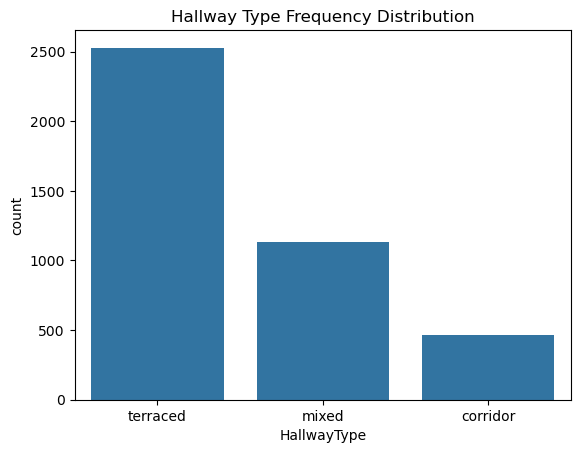

In [7]:
# Bar plot
sns.countplot(x='HallwayType', data=df)
plt.title('Hallway Type Frequency Distribution')
plt.show()

There are 3 hallway type; Terraced, Mixed, and Corridor. Majority of the property in daegu have terrace for its hallway.

- **B. Attribute: TimeToSubway**

In [8]:
df["TimeToSubway"].value_counts(dropna=False)

TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64

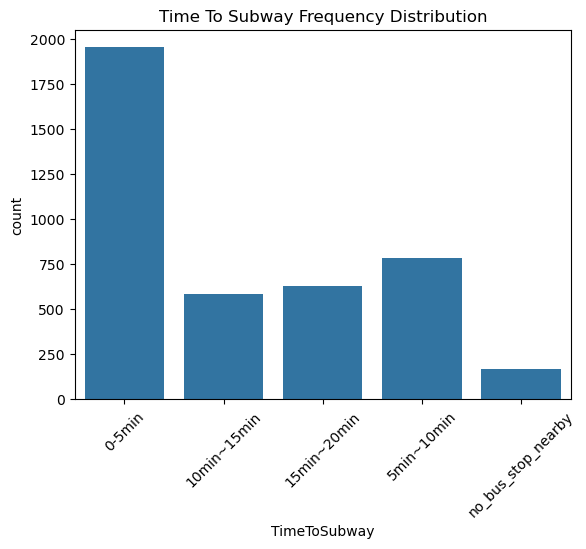

In [9]:
# Bar plot
sns.countplot(x='TimeToSubway', data=df)
plt.xticks(rotation=45)
plt.title('Time To Subway Frequency Distribution')
plt.show()

Time to subway technically represent how far the property to subway location, Five categorical data was made within range of 0-20 minutes and no subway nearby.

- **C. Attribute: SubwayStation**

In [10]:
df["SubwayStation"].value_counts(dropna=False)

SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64

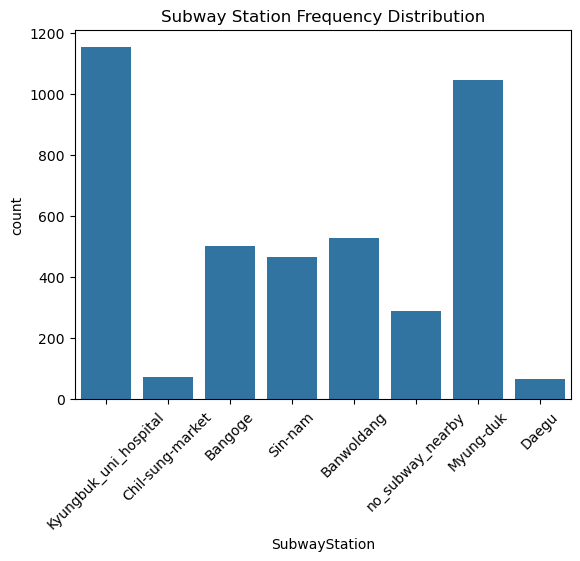

In [11]:
# Bar plot
sns.countplot(x='SubwayStation', data=df)
plt.title('Subway Station Frequency Distribution')
plt.xticks(rotation=45)
plt.show()

There are 7 subway stations around the daegu property. The number of properties near Kyungbuk Uni Hospital exceeds the number of other stations, while there are only a few properties around Daegu station and Chil Sung market.

- **D. Findings and Recommendations**

1. Overall features having categorical data types have No Missing Value nor Cardinality Issue. 

1. Use One-Hot Encoding for "HallwayType" and "SubwayStation" features. This method is ideal for nominal categorical variables with no inherent order (e.g., 'terrace', 'mixed', 'corridor'). OHE increases the dimensionality of the dataset, which can be computationally expensive for categories with many unique values.

1. Use Ordinal Encoding for "TimeToSubway" feature. This method explicitly assumes that there is an intrinsic order among the categories. For instance, feature ["0-5 minutes", "5-10 minutes", "10-15 minutes"], can encode them as [0, 1, 2]. It is appropriate because it preserves the order information.

#### **2.2.2 Numeric Data Types**

Just like categorical data types numeric data types also need to have no missing values and outliers, have normal distribution. We can also identify the correlation between features.

- **A. Decriptive Satistics**

In [12]:
# Create data frame for numerical value
num_var = df.select_dtypes('number')
num_var.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


Based on the descriptive statistics there's no negative nor extreme value. But the variance and standard deviation from "Size" and "SalePrice" are pretty high. we need to make sure wheter it is acceptable or not.

- **B. Checking for Outliers**

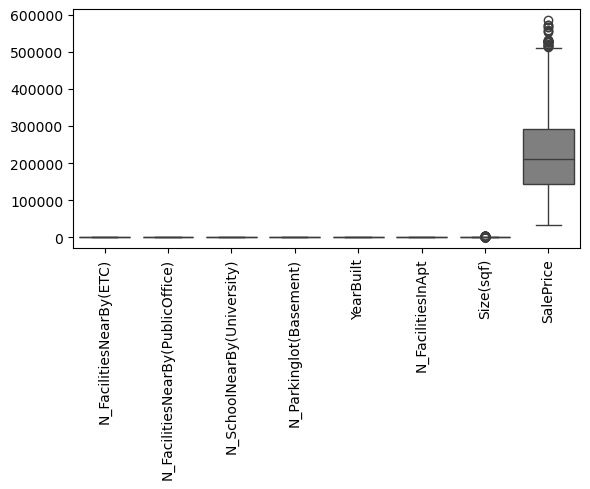

In [13]:
# Identify outlier using boxplot
plt.figure(figsize=(6,5))
sns.boxplot(data=num_var)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There are outlier on "size(sqf)" and "SalePrice", we need to remove it from dataset to improve the machine learning performance and accuracy.

- **C. Display the frequency distribution**

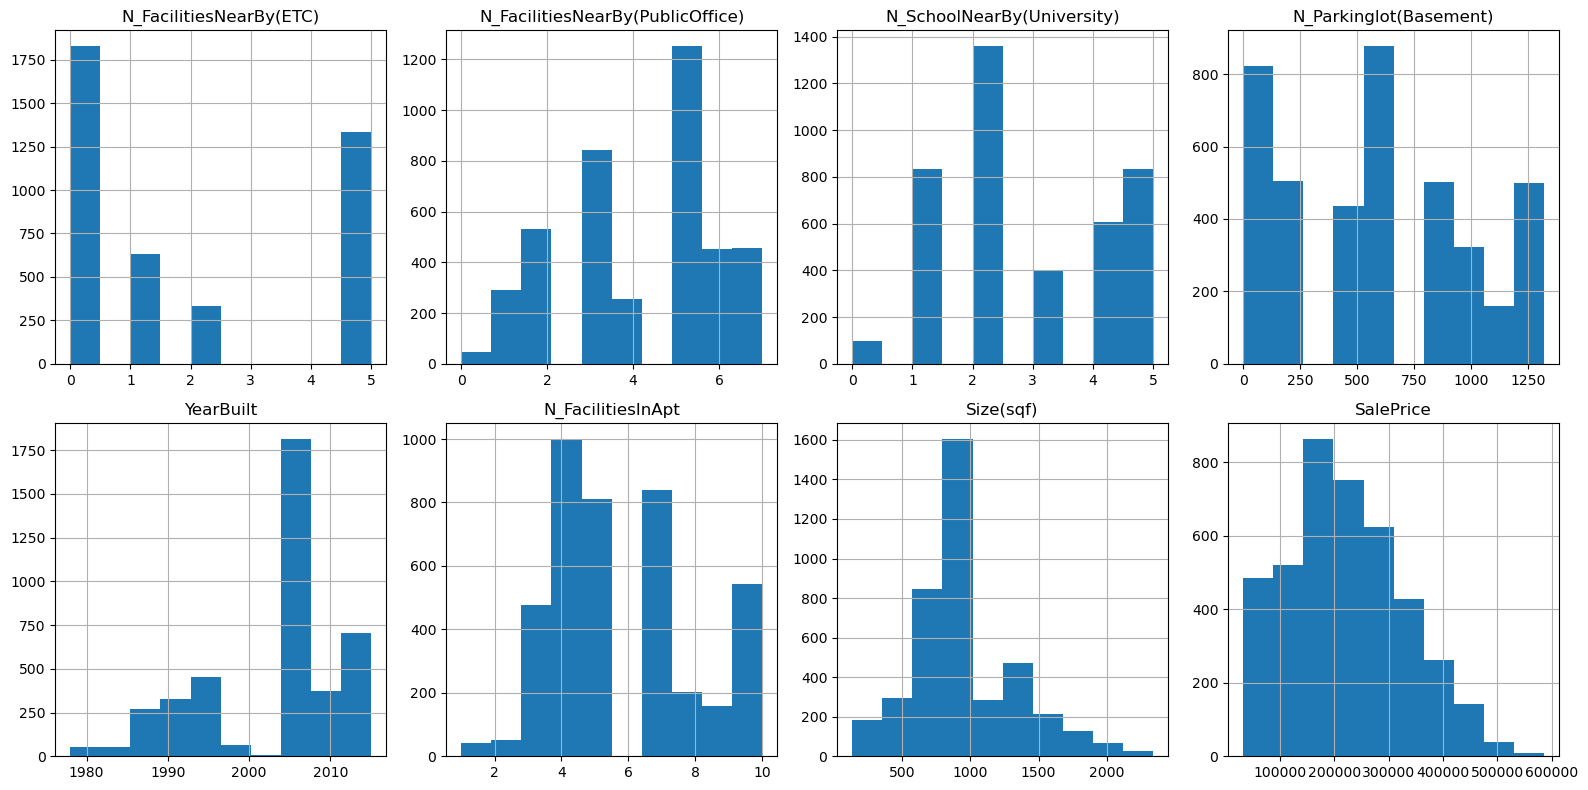

In [14]:
# Display numerical data distribution
df.hist(layout= (2,4), figsize=(16, 8))
plt.tight_layout()
plt.show()

Most of the dataset was not normally distributed, it is acceptable because the number of facilities (School, Parkinglot, Public office, etc) can vary or even have a zero values. But for price it is better to have normal distribution.

- **D. Correlation Matrics**

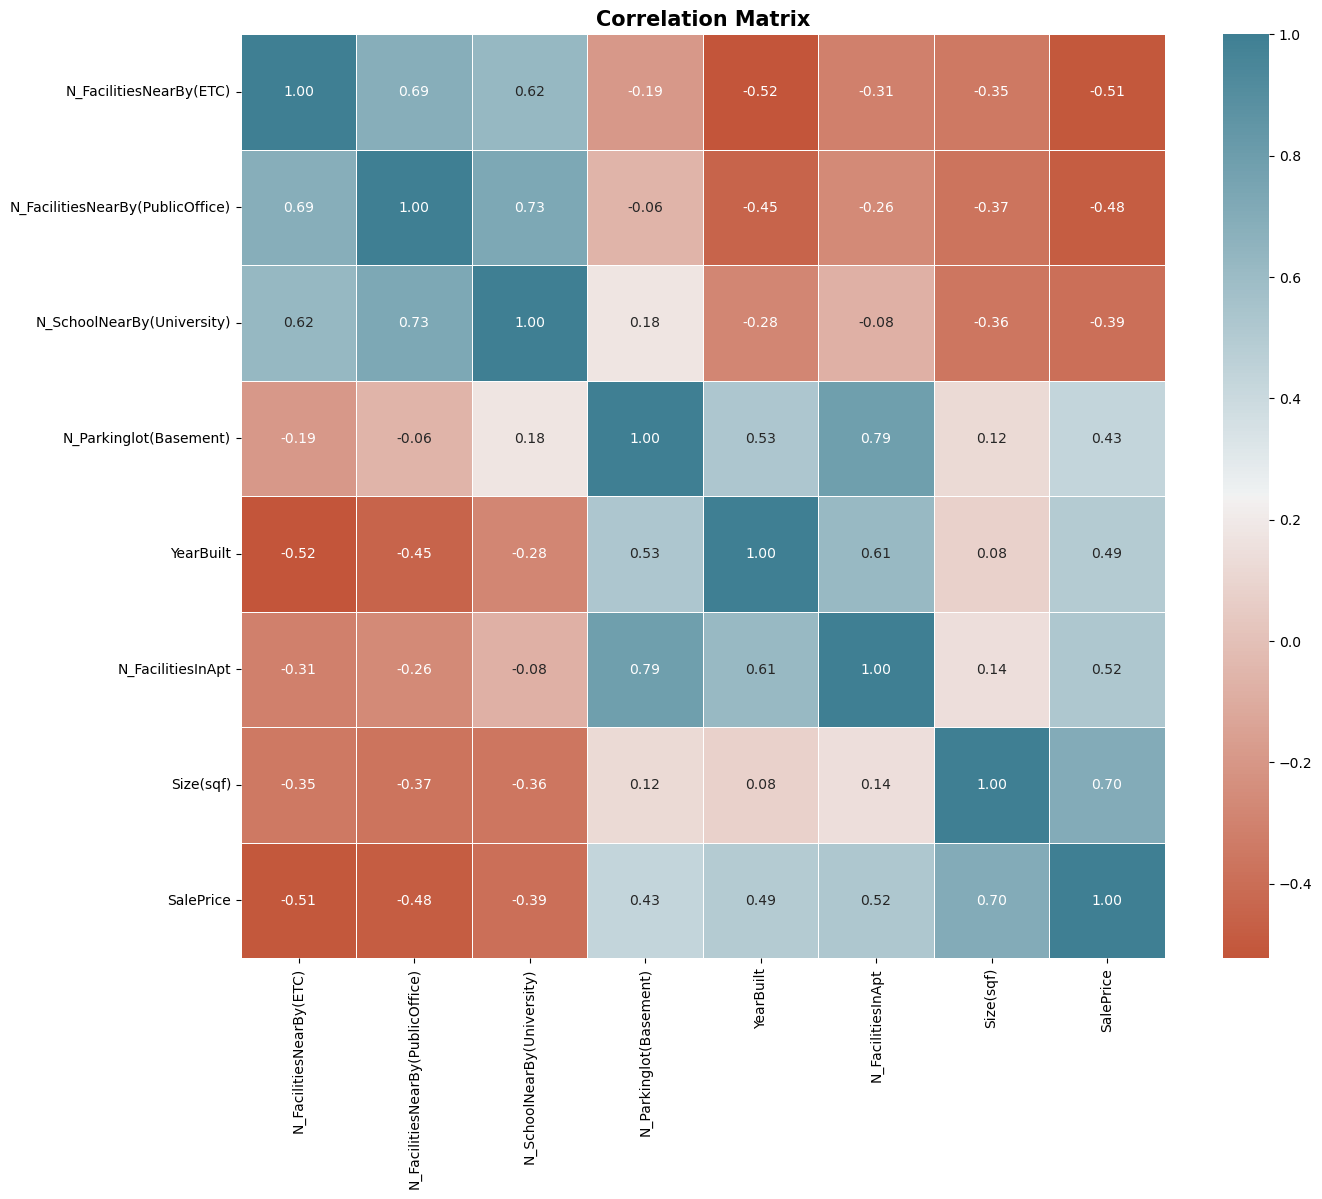

In [15]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = num_var.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

"SalePrice" is relatively correlated with "Size" and "N_FacilitiesInApt". Meanwhile the "N_FacilitiesNearBy" correlated to each other (University, Public Office, ETC)

<Axes: xlabel='SalePrice', ylabel='Density'>

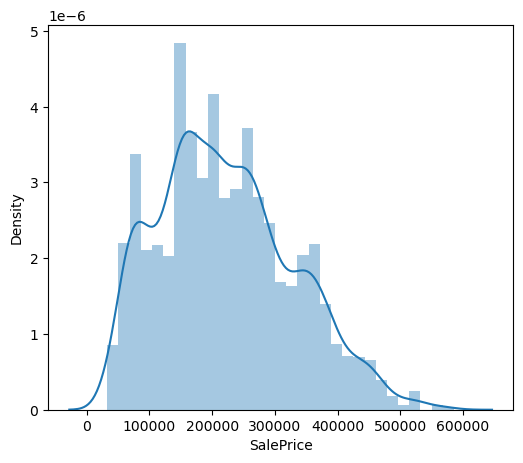

In [16]:
# Show 'SalePrice' distribution
plt.figure(figsize=(6,5))
sns.distplot(df['SalePrice'])

In [17]:
sale_price= df.groupby('SubwayStation').agg({'SalePrice': 'median'}).sort_values('SalePrice', ascending=False)
hallway_type= df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='count')
sale_price.join(hallway_type)

,SalePrice,corridor,mixed,terraced
SubwayStation,,,,
Banwoldang,315929.0,50.0,NaN,479.0
Sin-nam,247787.0,51.0,NaN,416.0
Kyungbuk_uni_hospital,238938.0,49.0,NaN,1103.0
no_subway_nearby,207743.0,41.0,NaN,249.0
Bangoge,167035.0,NaN,502.0,NaN
Myung-duk,154424.5,222.0,555.0,267.0
Chil-sung-market,88495.0,NaN,74.0,NaN
Daegu,86725.0,51.0,NaN,14.0


The median selling price for apartments in the Bandwoldang area has the highest value compared to other areas. In fact, it is almost 3x the size of Chilsung Market, which is the area with the cheapest prices.

Text(0.5, 1.0, 'Median Price of Hallway Types')

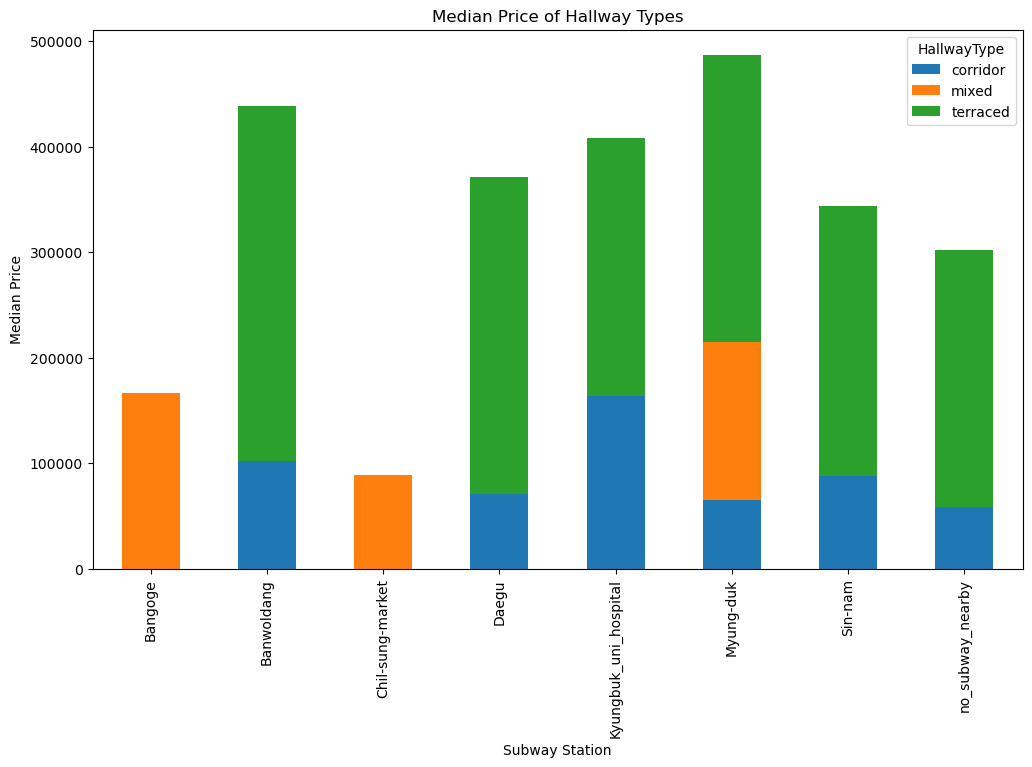

In [18]:
median_price = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

pivot_plot = median_price.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Hallway Types')

If we look at the median apartment price based on hallway type, it turns out that apartments with terraces are relatively higher than corridor and mixed types. In the Bangoge and Chilsung market areas, only mixed type apartments are available.

- **E. Findings/Recommendation**

1. Based on 'Size(sqf)' and 'SalePrice' features, there're outlier that need to be cleaned.
1. Apartment's Sale Price are relatively correlated with its size and number of facilities.
1. Median Sale Price also differs according to nearest Subway Station and its Hallway Type.
1. Overall data distribution is not normal, some of them are imbalanced on each category.

## **III. Data Preprocessing**

### **3.1 Data Cleaning**

#### **3.1.1 Remove Duplicated Data**

In [19]:
# Checking for Duplicated Data
df.duplicated().sum()

1422

In [20]:
# Display the duplicated data
df[df.duplicated(keep=False)].sort_values('SalePrice')

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
804,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513
163,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513
647,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398
2262,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398
1068,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398
...,...,...,...,...,...,...,...,...,...,...,...
971,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,529203
3379,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,529203
3868,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,529203
550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796


From the data above we can see that there're 1422 duplicated data (34,5% of total data). Since we are going to develop machine learning to predict property price, it is neccessary to drop the duplicated data.

In [21]:
# Drop Duplicated Data
df.drop_duplicates(inplace=True)

# Re-Checking for Duplicated Data
df.duplicated().sum()

0

#### **3.1.2 Check for missing value**

In [22]:
# Checking the total missing value from each columns
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

So bascically there's no missing value. Zero or null values for the "N_" column (ex: N_FacilitiesInApt) are acceptable because this column represent the number of mentioned things inside or near the property, null means the absence of it.

<Axes: >

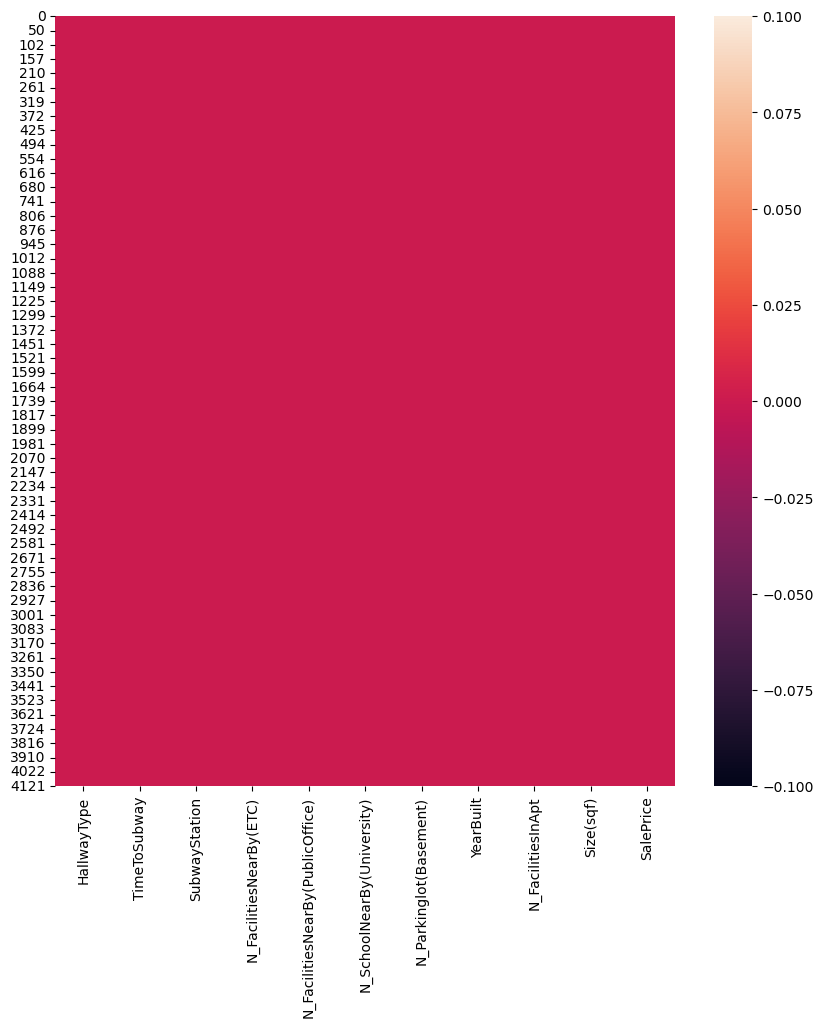

In [23]:
# Visualize the missing value distribution using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

#### **3.1.3 Remove Outlier**

Based on EDA, there are outlier on feature "Size(sqf)" and "SalePrice". We need to eliminates them.

- Outlier in Apartment Sale Price

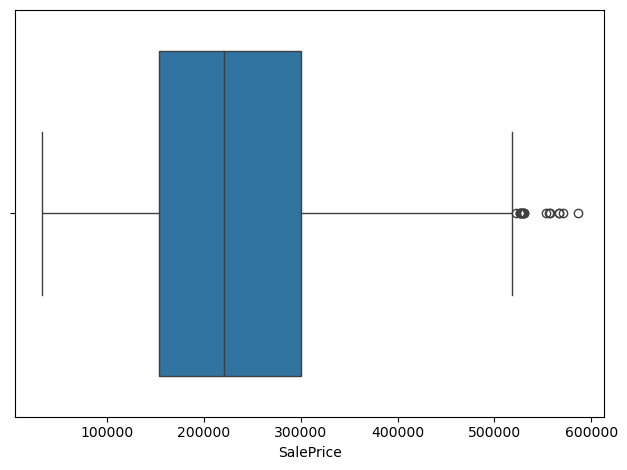

In [24]:
sns.boxplot(data=df, x="SalePrice")
plt.tight_layout()
plt.show()

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) at column 'SalePrice'
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
max_value = df['SalePrice'].max()

# Print 
print(f'Lower bound of Sale Price : {lower_bound}')
print(f'Upper bound of Sale Price : {upper_bound}')
print(f'Max of Sale Price: {max_value}')

# Check number of outlier
print("Number of data outliers:", len(df[(df['SalePrice'] <= lower_bound) | (df['SalePrice'] >= upper_bound)]))

Lower bound of Sale Price : -67478.5
Upper bound of Sale Price : 521901.5
Max of Sale Price: 585840
Number of data outliers: 17


- Outlier in Apartment Size(sqf)

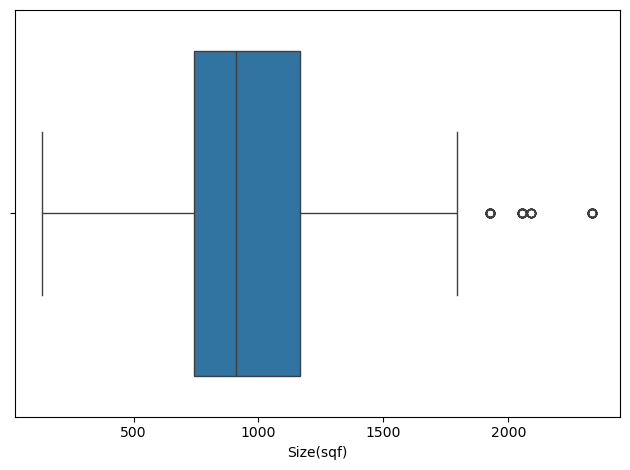

In [26]:
sns.boxplot(data=df, x="Size(sqf)")
plt.tight_layout()
plt.show()

In [27]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) at column 'Size(sqf)'
Q1 = df['Size(sqf)'].quantile(0.25)
Q3 = df['Size(sqf)'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
max_value = df['Size(sqf)'].max()

# Print 
print(f'Lower bound of Apartment Size : {lower_bound}')
print(f'Upper bound of Apartment Size : {upper_bound}') 
print(f'Max of Apartment Size : {max_value}')

# Check number of outlier
print("Number of data outliers:", len(df[(df['Size(sqf)'] <= lower_bound) | (df['Size(sqf)'] >= upper_bound)]))

Lower bound of Apartment Size : 107.0
Upper bound of Apartment Size : 1803.0
Max of Apartment Size : 2337
Number of data outliers: 84


- Outlier Exploration

In [28]:
# Display outlier from both size and sale price
outlier_data = df[(df['Size(sqf)'] > 1803.0 ) | (df['SalePrice'] > 521901.5)]
outlier_data = outlier_data.sort_values('SalePrice')
outlier_data

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,176991
2045,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,185840
493,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,190265
4027,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,193805
546,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,194690
...,...,...,...,...,...,...,...,...,...,...,...
3545,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,557522
204,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796


In [29]:
outlier_data.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.422222,3.466667,2.711111,773.800000,2001.144444,6.588889,2062.600000,372876.255556
std,2.187697,1.897367,1.416154,424.865245,7.621025,2.763707,202.114152,115716.311280
min,0.000000,1.000000,1.000000,0.000000,1986.000000,4.000000,1519.000000,176991.000000
25%,0.000000,1.500000,2.000000,536.000000,1993.000000,4.000000,1928.000000,281243.000000
50%,0.000000,3.000000,2.000000,536.000000,2006.000000,5.000000,2056.000000,374274.000000
75%,5.000000,6.000000,5.000000,1270.000000,2007.000000,10.000000,2337.000000,459733.750000
max,5.000000,6.000000,5.000000,1270.000000,2007.000000,10.000000,2337.000000,585840.000000


In [30]:
# Describe outlier data information
listData= []
for col in outlier_data.columns:
    listData.append( [col, outlier_data[col].nunique(), outlier_data[col].unique()])

tableDescription = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listData)
tableDescription

,Column Name,Number of Unique,Unique Sample
0,HallwayType,2,"[mixed, terraced]"
1,TimeToSubway,3,"[15min~20min, 10min~15min, 0-5min]"
2,SubwayStation,3,"[Myung-duk, Kyungbuk_uni_hospital, Sin-nam]"
3,N_FacilitiesNearBy(ETC),3,"[5.0, 1.0, 0.0]"
4,N_FacilitiesNearBy(PublicOffice),4,"[6.0, 5.0, 1.0, 3.0]"
5,N_SchoolNearBy(University),3,"[5.0, 1.0, 2.0]"
6,N_Parkinglot(Basement),3,"[536.0, 0.0, 1270.0]"
7,YearBuilt,4,"[1993, 1986, 2006, 2007]"
8,N_FacilitiesInApt,3,"[4, 5, 10]"
9,Size(sqf),6,"[2337, 2092, 2056, 1928, 1643, 1519]"


Based on its characteristics, the apartments considered outliers are located in urban areas near Myung-duk, Kyung-buk, and Sin-nam subway stations. These apartments feature mixed hallways and terraces, were built between 1993 and 2007, and have relatively larger sizes compared to other apartments (ranging from 1,519 to 2,337 square feet).

It can be assumed that these apartments could be typical for high-end or luxury apartments. An apartment size of over 1,800 square feet is quite large by typical standards, especially for urban areas, where typical urban apartments are usually much smaller, often ranging from 600 to 1,200 square feet. In terms of rental prices, these apartments are also relatively more expensive, averaging around 373,876 won.

Despite constituting only 2.18% of the total data (90 outliers), these apartments are considered meaningful and not errors. Given their small percentage and unique characteristics, we've decided to retain them in our dataset.

#### **3.1.4 Checking for Anomaly**

In [31]:
# Checking 'SubwayStation' and 'TimeToSubway' category
df.groupby(['SubwayStation', 'TimeToSubway']).size()

SubwayStation          TimeToSubway      
Bangoge                5min~10min            280
Banwoldang             0-5min                301
                       5min~10min             32
Chil-sung-market       15min~20min            65
Daegu                  5min~10min             54
Kyungbuk_uni_hospital  0-5min                402
                       10min~15min           290
Myung-duk              0-5min                212
                       10min~15min           144
                       15min~20min           353
Sin-nam                0-5min                333
                       5min~10min             47
no_subway_nearby       5min~10min             88
                       no_bus_stop_nearby    100
dtype: int64

There's anomaly in no_subway_nearby, 88 apartment spotted have 5-10 minutes time to subway. We should drop the data.

In [32]:
# make anomaly variable
anomaly = df[(df['SubwayStation'] == 'no_subway_nearby') & (df['TimeToSubway']== '5min~10min')]

# Drop the anomaly
df.drop(anomaly.index, inplace=True)

#### **3.1.5 Formatting Matters**

In [33]:
# Fix formatting error on TimeToSubway
df['TimeToSubway'] = df['TimeToSubway'].replace({
    '10min~15min': '10-15min',
    '15min~20min': '15-20min',
    '5min~10min': '5-10min'})

# Fix Formatting error on SubwayStation
df['SubwayStation'] = df['SubwayStation'].replace({
    'Kyungbuk_uni_hospital': 'Kyungbuk-uni-hospital'})

In [34]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2613.000000,2613.000000,2613.000000,2613.000000,2613.00000,2613.000000,2613.000000,2613.000000
mean,1.943360,4.096824,2.737084,519.052813,2001.94336,5.665519,996.410256,228443.476847
std,2.167703,1.862060,1.497110,406.550858,9.01576,2.285823,387.611862,103234.595478
min,0.000000,0.000000,0.000000,0.000000,1978.00000,2.000000,206.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.00000,4.000000,743.000000,154424.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.00000,5.000000,910.000000,219469.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.00000,7.000000,1192.000000,295575.000000
max,5.000000,7.000000,5.000000,1270.000000,2015.00000,10.000000,2337.000000,585840.000000


In [35]:
listData= []
for col in df.columns:
    listData.append( [col, df[col].nunique(), df[col].unique()])

tableDescription = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listData)
print(df.shape)
tableDescription

(2613, 11)


,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10-15min, 15-20min, 5-10min, no_bus_s..."
2,SubwayStation,8,"[Kyungbuk-uni-hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),18,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,8,"[10, 4, 5, 7, 2, 9, 8, 3]"
9,Size(sqf),82,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


From total of 4123 rows we cleaned the dataset from 1422 duplicated data and 88 anomalies (36,6%). Therefore we have 2613 clean data as resources to develop apartement price prediction model.

### **3.2 Check Distribution of Target**

Checking the distribution of the target variable is an important step in developing a machine learning model, especially for regression tasks, for several key reasons:

- The choice of **error metrics** (e.g., Mean Squared Error, Mean Absolute Error) can be influenced by the distribution of the target variable. Understanding the distribution helps in selecting the most appropriate metric
- If the target variable is not normally distributed, **transformations** like log, square root, or Box-Cox can be applied to make the distribution more normal-like, improving model performance.
- Understanding the target distribution helps in selecting the most appropriate **model** for the task. 

<Axes: xlabel='SalePrice', ylabel='Density'>

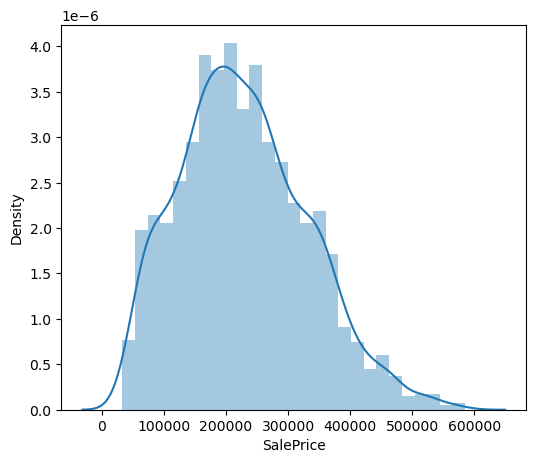

In [36]:
# Show 'SalePrice' distribution
plt.figure(figsize=(6,5))
sns.distplot(df['SalePrice'])

In [37]:
# Check for Normal distribution using statistical model
from scipy.stats import shapiro

stat, p_value = shapiro(df['SalePrice'])

print('Shapiro-Wilk Test:')
print('Statistic:', stat)
print('p-value:', p_value)

if p_value > 0.05:
    print('The target variable is likely normally distributed.')
else:
    print('The target variable is not normally distributed.')


Shapiro-Wilk Test:
Statistic: 0.9822805523872375
p-value: 1.52967979506757e-17
The target variable is not normally distributed.


### **3.3 Check for Multicollinearity**

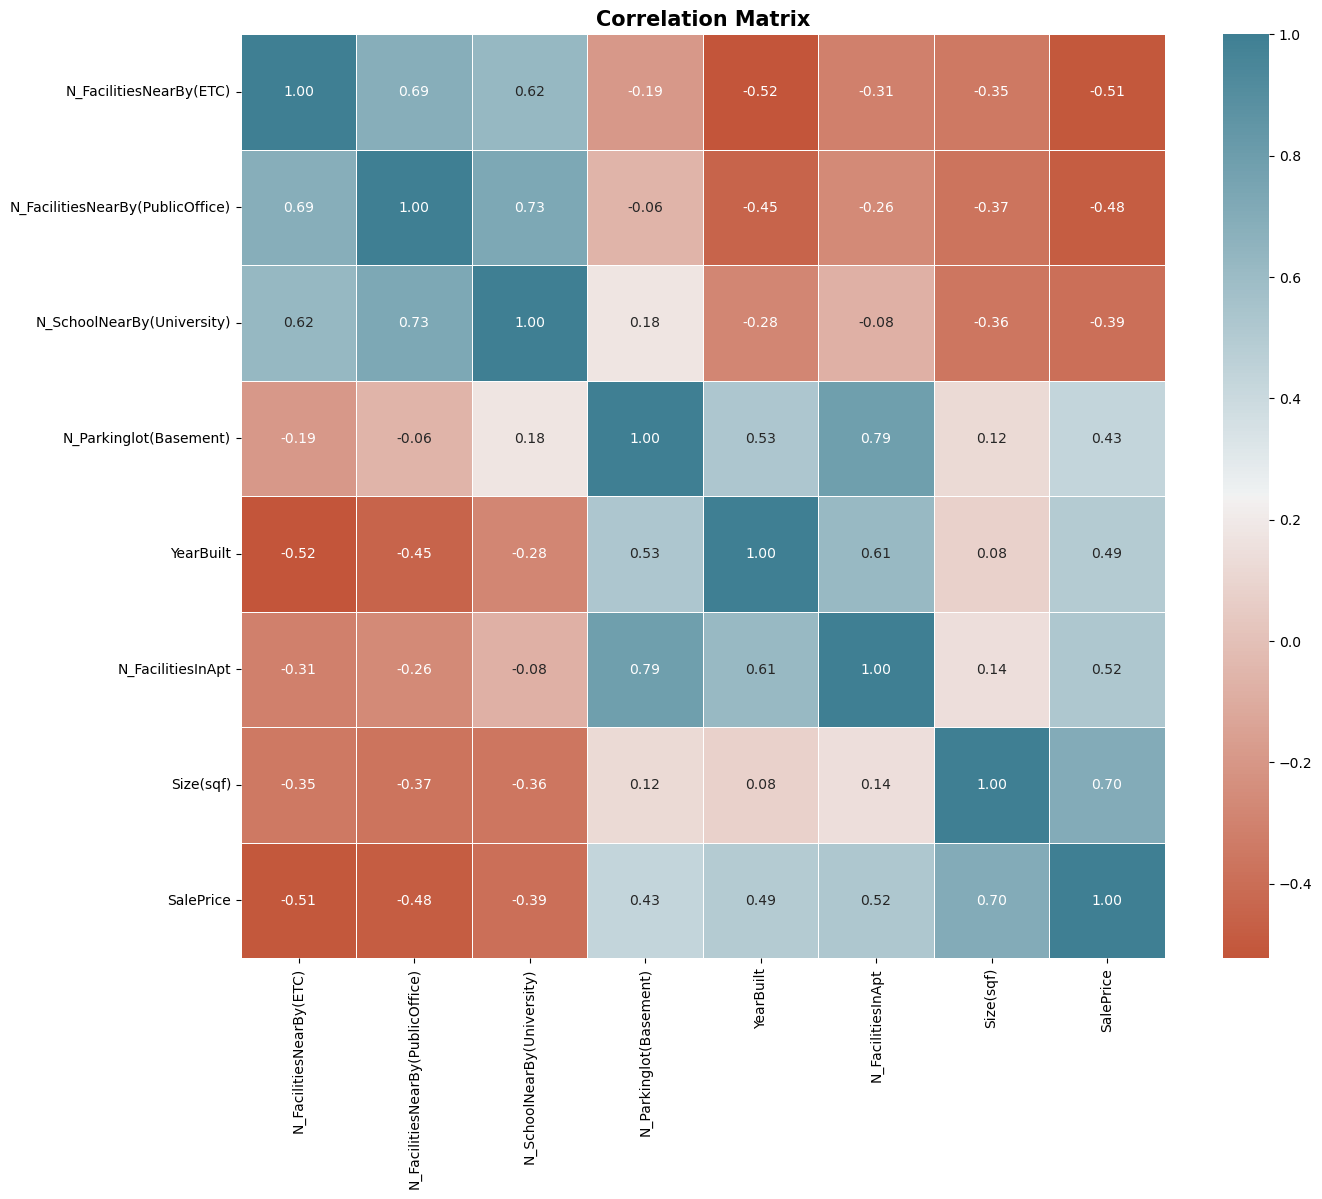

In [38]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = num_var.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

In [39]:
# define function to calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif = pd.DataFrame()
    vif['column'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    
    return vif

In [40]:
# calculate Vif
calc_vif(df[['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)']])

,column,VIF
0,N_FacilitiesNearBy(ETC),6.022058
1,N_FacilitiesNearBy(PublicOffice),14.107873
2,N_SchoolNearBy(University),17.793242
3,N_Parkinglot(Basement),12.244461
4,YearBuilt,37.104189
5,N_FacilitiesInApt,28.607699
6,Size(sqf),9.944374


Almost all of features have VIF > 10, it Indicates high multicollinearity. In real estate, features like size, amenities, and year of construction are highly correlated in determining apartment prices. While this collinearity might suggest redundancy, it's often beneficial to retain these variables due to their individual importance in price prediction. So, Consider the business context and the specific goals of the analysis it is better to keep collinear features.

## **IV. Modeling**

### **Import Library**

In [41]:
# Import library 

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning Algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [42]:
# Duplicate dataframe
df_model = df.copy()
df_model.head(5)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk-uni-hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10-15min,Kyungbuk-uni-hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15-20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5-10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### **4.1 Feature Engineering**

#### **4.1.1 Scaling and Encoding**

Scaling transforms numeric data so that variables have the same scale. Some machine learning algorithms can perform better when the scale used is the same. 
- **Robust Scaler**, since our data is not normally distributed the best scalling method is Robust Scaler. This method is particularly useful in scenarios where we want to normalize our data but need to minimize the effect of outliers.

In order to use all selected features, categorical features must be converted into numeric features. Use ColumnTransformer to change the data type, which can then be applied to the model pipeline.

- **One Hot Encoder**, for categorical features with inherent order : 'HallwayType' and 'SubwayStation'
<br> This method increases the dimensionality of the dataset.
- **Ordinal Encoder**, for categorical features where the categories have a meaningful order : 'TimeToSubway'

In [43]:
# make variable to save data types
numeric_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 
'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)']
ohe_features = ['HallwayType', 'SubwayStation']
ordinal_features = ['TimeToSubway']

In [44]:
# Mapping for ordinal encoders
ordinal_map = [{'col':'TimeToSubway',
                'mapping':{'0-5min':1,
                '5min-10min':2,
                '10min-15min':3,
                '15min-20min':4,
                'no_bus_stop_nearby':5}}]

In [45]:
# Create Column Transformer to save scaling and encoding process
pre_processing_transformer = ColumnTransformer([
    ('Scaling', RobustScaler(), numeric_features),
    ('Encoding_OHE', OneHotEncoder(drop='first'), ohe_features),
    ('Encoding_Ordinal', OrdinalEncoder(mapping=ordinal_map), ordinal_features)
], remainder='passthrough')

pre_processing_transformer 

ColumnTransformer(remainder='passthrough',
                  transformers=[('Scaling', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'N_FacilitiesInApt',
                                  'Size(sqf)']),
                                ('Encoding_OHE', OneHotEncoder(drop='first'),
                                 ['HallwayType', 'SubwayStation']),
                                ('Encoding_Ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                          'data_type': dtype('O'),
                                                          'mapping': 0-5min                1
5min-10min            2
10min-15min           3
15min-20min           4
no_bus_stop_nearby    5
dtype: int64}]),
                                 ['TimeToSubway'])])

#### **4.1.2 Data Spliting**

In [46]:
#  Define feature and target variable
feature = df_model.drop('SalePrice', axis=1)
target = df_model ['SalePrice']

In [47]:
# Split data into testing and training
x_train, x_test, y_train, y_test = train_test_split(feature, target, 
                                                    test_size=0.2,
                                                    random_state=48)

### **4.2 Benchmarking Model**

#### **4.2.1 Prepare The Algorithm**

To develop machine learning in predicting apartment prices, the ideal method is regression model. A regression model is ideal for real estate because it effectively captures the relationship between various property features (such as location, size, age, and facilities) and the target variable, which is typically the property price. By analyzing historical data, regression models can identify trends and patterns, providing accurate predictions for property values. These are the models that offer a variety of approaches to regression, each with its strengths and weaknesses:

**1. Linear Regression (lr)**
<br>Linear Regression is a simple and widely-used regression algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. It assumes a linear relationship between the input features and the target variable.

**2. K-Nearest Neighbors Regressor (knn)**
<br>K-Nearest Neighbors Regressor is a non-parametric method that predicts the target value for a given input by averaging the target values of its k nearest neighbors in the feature space. It relies on distance metrics (like Euclidean distance) to find the neighbors and can capture non-linear relationships.

**3. Ridge Regression (ridge)**
<br>Ridge Regression is a type of linear regression that includes an L2 regularization term in the loss function. This penalty term shrinks the coefficients of less important features, thus handling multicollinearity and reducing overfitting. The regularization strength is controlled by the parameter alpha.

**4. Lasso Regression (lasso)**
<br>Lasso Regression is another form of linear regression that incorporates an L1 regularization term. This regularization can shrink some coefficients to zero, effectively performing feature selection. Lasso is useful when we suspect that many features are irrelevant or redundant.

**5. Decision Tree Regressor (dt)**
<br>Decision Tree Regressor is a non-linear model that splits the data into subsets based on feature values, creating a tree-like structure. Each node represents a decision based on a feature, and each leaf node represents a predicted value. It can handle both numerical and categorical data but is prone to overfitting if not properly pruned.

**6. Extra Tree Regressor (et)**
<br>Extra Tree Regressor is similar to a Decision Tree but introduces more randomness during the training process. It selects splits more randomly, which can help to reduce variance and overfitting. It is part of the ensemble learning technique and often used within the ExtraTrees ensemble.

**7. Random Forest Regressor (rf)**
<br>Random Forest Regressor is an ensemble learning method that builds multiple decision trees and merges them to get a more accurate and stable prediction. Each tree is trained on a random subset of the data and features, which helps to reduce overfitting and improve generalization.

**8. Gradient Boosting Regressor (gbr)**
<br>Gradient Boosting Regressor is an ensemble technique that builds trees sequentially. Each new tree corrects the errors of the previous trees by optimizing a loss function. It combines the strengths of multiple weak models (typically decision trees) to create a strong predictive model. It is effective for both regression and classification tasks.

**9. XGBoost Regressor (xgb)**
<br>XGBoost Regressor is an advanced implementation of gradient boosting that includes regularization, handling missing values, and parallel computation. It is highly efficient, flexible, and widely used in machine learning competitions due to its performance and speed. XGBoost stands for Extreme Gradient Boosting.

In Bechmarking model we want to find what is the best model that suits our current datasets.

In [48]:
# Define Algorithm
lr = LinearRegression()
knn = KNeighborsRegressor()
ridge = Ridge(random_state=48)
lasso = Lasso(random_state=48)
dt = DecisionTreeRegressor(random_state=48)
et = ExtraTreeRegressor(random_state=48)
rf = RandomForestRegressor(random_state=48)
gbr = GradientBoostingRegressor(random_state=48)
xgb = XGBRegressor(random_state=48)

# Modeling in logarithmics scale, then inverse it for intepretation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_et = TransformedTargetRegressor(et, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gbr = TransformedTargetRegressor(gbr, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = RobustScaler()

# Store Algorithm to variable
models = [log_lr, log_knn, log_ridge, log_lasso, log_dt, log_et, log_rf, log_gbr, log_xgb]

#### **4.2.2 Calculate The Evaluation Metrics**

The best evaluation metric for regression machine learning models depends on the specific context and requirements of the task. Here are some commonly used metrics and their suitability:

**1. Root Mean Squared Error (RMSE)**
<br>Suitability: When you want to penalize larger errors more but still interpret the results in the same units as the target variable.
<br>Interpretability: Easier to interpret than MSE because it is in the same units as the target variable.
<br>Sensitivity to Outliers: Highly sensitive to outliers, like MSE.

**2. Mean Absolute Error (MAE)**
<br>Suitability: When you want to measure the average magnitude of errors in the same units as the target variable.
<br>Interpretability: Easy to understand because it represents the average absolute difference between predicted and actual values.
<br>Sensitivity to Outliers: Less sensitive to outliers compared to MSE and RMSE.

**3. Root Mean Squared Error (RMSE)**
<br>Suitability: When you want to penalize larger errors more but still interpret the results in the same units as the target variable.
<br>Interpretability: Easier to interpret than MSE because it is in the same units as the target variable.
<br>Sensitivity to Outliers: Highly sensitive to outliers, like MSE.

**4. Mean Absolute Percentage Error (MAPE)**
<br>MAPE measures the accuracy of a regression model by calculating the average absolute percentage difference between the predicted and actual values. 
<br> MAPE is often used in business and finance, where percentage errors are more meaningful than absolute errors.

In [49]:
# Create empty list to store result
# RMSE
rmse_score = []
rmse_mean_score = []
rmse_std_score = []

# MAE
mae_score = []
mae_mean_score = []
mae_std_score = []

# MAPE
mape_score = []
mape_mean_score = []
mape_std_score = []

# Calculate metrics to find best model using for loop
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', pre_processing_transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    rmse_score.append(model_cv_rmse)
    rmse_mean_score.append(model_cv_rmse.mean())
    rmse_std_score.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    mae_score.append(model_cv_mae)
    mae_mean_score.append(model_cv_mae.mean())
    mae_std_score.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    mape_score.append(model_cv_mape)
    mape_mean_score.append(model_cv_mape.mean())
    mape_std_score.append(model_cv_mape.std())

[-52716.744019   -54702.81010084 -52683.86591853 -50216.12774593
 -52995.05492573] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41699.32498511 -43551.57948375 -42359.2780526  -40489.926831
 -42084.31852083] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.19631584 -0.21277429 -0.22762076 -0.20361906 -0.21266863] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-48706.7241933  -52902.96914004 -48754.35016642 -47163.65425386
 -51410.01488687] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-38037.81817056 -41526.65973026 -38912.91207928 -38204.12926185
 -39642.02192921] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
  

#### **4.2.3 Evaluation Metrics Result**

In [50]:
# Store result to data frame
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Ridge Regression', 'Lasso Regression', 'DecisionTree Regressor', 'ExtraTree Regressor','RandomForest Regressor', 'GradientBoosting Regressor','XGBoost Regressor'],
    'Mean_RMSE': rmse_mean_score,
    'Std_RMSE': rmse_std_score,
    'Mean_MAE': mae_mean_score,
    'Std_MAE': mae_std_score,
    'Mean_MAPE': mape_mean_score,
    'Std_MAPE': mape_std_score
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-52662.920542,1432.591590,-42036.885575,990.708124,-0.210600,0.010502
1,KNN Regressor,-49787.542528,2071.653636,-39264.708234,1265.909769,-0.199402,0.012101
2,Ridge Regression,-52686.777787,1439.710973,-42192.612879,964.221324,-0.211284,0.010732
3,Lasso Regression,-105557.668516,5094.107485,-83437.173474,3681.291889,-0.493544,0.039811
4,DecisionTree Regressor,-46955.264472,1250.477426,-37366.800500,999.510160,-0.186350,0.007195
5,ExtraTree Regressor,-46989.336504,1234.270177,-37418.394256,978.211165,-0.186786,0.007718
6,RandomForest Regressor,-46963.580064,1276.689673,-37401.830823,1031.122635,-0.186621,0.006747
7,GradientBoosting Regressor,-46767.362026,1280.792939,-37382.606445,898.253123,-0.186208,0.006804
8,XGBoost Regressor,-47104.082704,1432.132184,-37446.249830,1079.020849,-0.186531,0.006782


In [51]:
result = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Ridge Regression', 'Lasso Regression', 'DecisionTree Regressor', 'ExtraTree Regressor','RandomForest Regressor', 'GradientBoosting Regressor','XGBoost Regressor'],
    'Mean_RMSE': rmse_mean_score,
    'Std_RMSE': rmse_std_score,
    'Mean_MAE': mae_mean_score,
    'Std_MAE': mae_std_score,
    'Mean_MAPE': mape_mean_score,
    'Std_MAPE': mape_std_score
})

result.sort_values('Mean_MAPE', ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
7,GradientBoosting Regressor,-46767.362026,1280.792939,-37382.606445,898.253123,-0.186208,0.006804
4,DecisionTree Regressor,-46955.264472,1250.477426,-37366.800500,999.510160,-0.186350,0.007195
8,XGBoost Regressor,-47104.082704,1432.132184,-37446.249830,1079.020849,-0.186531,0.006782
6,RandomForest Regressor,-46963.580064,1276.689673,-37401.830823,1031.122635,-0.186621,0.006747
5,ExtraTree Regressor,-46989.336504,1234.270177,-37418.394256,978.211165,-0.186786,0.007718
1,KNN Regressor,-49787.542528,2071.653636,-39264.708234,1265.909769,-0.199402,0.012101
0,Linear Regression,-52662.920542,1432.591590,-42036.885575,990.708124,-0.210600,0.010502
2,Ridge Regression,-52686.777787,1439.710973,-42192.612879,964.221324,-0.211284,0.010732
3,Lasso Regression,-105557.668516,5094.107485,-83437.173474,3681.291889,-0.493544,0.039811


In [52]:
# Benchmark two best Regressor
models = {
    'GradientBoost': GradientBoostingRegressor(random_state=48),
    'DecisionTree': DecisionTreeRegressor(random_state=48)
}

rmse_score = []
mae_score = []
mape_score = []

# Test set prediction
for i in models:
    model = Pipeline([
        ('preprocessing', pre_processing_transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_score.append(mean_absolute_error(y_test, y_pred))
    mape_score.append(mean_absolute_percentage_error(y_test, y_pred))

# Store result in data frame
model_score = pd.DataFrame({'RMSE': rmse_score, 'MAE': mae_score, 'MAPE': mape_score}, index=models.keys())
model_score

,RMSE,MAE,MAPE
GradientBoost,47641.252673,39100.844873,0.192342
DecisionTree,47687.123658,38949.695516,0.191775


From this figure, it can be concluded that the **Decision Tree Regressor** model have the best performance based on the lowest MAE, MSE, and RMSE values compared to other models. This shows that this model has a lower prediction error rate and generally provides more accurate predictions for the data used.

### **4.3 Hyperparameter Tuning**

#### **4.3.1 Parameter Tuning**

In [53]:
# Define Variation of Params for Best model
param_grid = {
    'model__criterion': ['mse', 'friedman_mse'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': [None, 10, 50],
    'model__min_samples_split': [2, 20],
    'model__min_samples_leaf': [1, 10],
    'model__max_features': [None, 'auto', 'sqrt']
}

# Benchmark model with hyperparameter tuning
dt = DecisionTreeRegressor(random_state=48)

# Create algorithm chains
estimator_dt = Pipeline([
        ('preprocessing', pre_processing_transformer),
        ('scaler', scaler),
        ('model', dt)
        ])

# Setup the grid search
grid_search = GridSearchCV(estimator=estimator_dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaling',
                                                                         RobustScaler(),
                                                                         ['N_FacilitiesNearBy(ETC)',
                                                                          'N_FacilitiesNearBy(PublicOffice)',
                                                                          'N_SchoolNearBy(University)',
                                                                          'N_Parkinglot(Basement)',
                                                                          'N_FacilitiesInApt',
                                                                          'Size(sqf)']),
                                                                        ('Encoding_OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['HallwayType...
                                                                         ['TimeToSubway'])])),
                                       ('scaler', RobustScaler()),
                                       ('model',
                                        DecisionTreeRegressor(random_state=48))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['mse', 'friedman_mse'],
                         'model__max_depth': [None, 10, 50],
                         'model__max_features': [None, 'auto', 'sqrt'],
                         'model__min_samples_leaf': [1, 10],
                         'model__min_samples_split': [2, 20],
                         'model__splitter': ['best', 'random']},
             verbose=1)

In [54]:
# Display best params score
print('Decision Tree Regressor')
print('Best_score:', grid_search.best_score_)
print('Best_params:', grid_search.best_params_)

Decision Tree Regressor
Best_score: 0.7880870473218147
Best_params: {'model__criterion': 'friedman_mse', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__splitter': 'best'}


#### **4.3.2 Performance Comparison**

In [55]:
# Predict test set using tuned model
# Model Gradient Boost
model = {'DecisionTree': DecisionTreeRegressor(random_state=48)}

# Define model using best param
model_tuning = grid_search.best_estimator_

# Fitting model
model_tuning.fit(x_train, y_train)

# Predict test set
y_pred_model_tuning = model_tuning.predict(x_test)

# store RMSE, MAE & MAPE score after tuning
rmse_model_tuning = np.sqrt(mean_squared_error(y_test, y_pred_model_tuning))
mae_model_tuning = mean_absolute_error(y_test, y_pred_model_tuning)
mape_model_tuning = mean_absolute_percentage_error(y_test, y_pred_model_tuning)

model_score_after_tuning = pd.DataFrame({'RMSE': rmse_model_tuning, 'MAE': mae_model_tuning, 'MAPE': mape_model_tuning}, index=model.keys())
print ("Score After Tuning:")
model_score_after_tuning

Score After Tuning:


,RMSE,MAE,MAPE
DecisionTree,47687.123658,38949.695516,0.191775


In [56]:
# Compare to score before tuning
print ("Score Before Tuning:")
pd.DataFrame(model_score.loc['DecisionTree']).T

Score Before Tuning:


,RMSE,MAE,MAPE
DecisionTree,47687.123658,38949.695516,0.191775


The model's performance improved (with reductions in RMSE, MAE, and MAPE) through hyperparameter tuning, even if only slightly.

- **RMSE, MAE, and MAPE after tuning**: 47.6, 38.9, 0.191

So far, the best performance model with lowest evaluation metrics result (RMSE, MAE, and MAPE) is Tuned Decision Tree Regressor. So we will use this as our final model.

### **4.4 Final Model Evaluation**

In [57]:
# finalize model
finalmodel= model_tuning
finalmodel

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaling', RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)']),
                                                 ('Encoding_OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType',
                                                   'SubwayStation']),
                                                 ('Encoding_Ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': 0-5min                1
5min-10min            2
10min-15min           3
15min-20min           4
no_bus_stop_nearby    5
dtype: int64}]),
                                                  ['TimeToSubway'])])),
                ('scaler', RobustScaler()),
                ('model',
                 DecisionTreeRegressor(criterion='friedman_mse',
                                       max_features='sqrt', random_state=48))])

After benchmarking 9 regression model and developing hyperparameter tuning, we decide to use Tuned Decision Tree Regressor Model. Decision tree regressors are a powerful machine learning algorithm that can be well-suited for predicting apartment prices. 

**Complex Relationships/ Non-Linearity:**
<br> Apartment prices can be influenced by a variety of factors that have complex and non-linear relationships. Decision trees can effectively capture these intricate relationships without requiring explicit feature engineering or transformations. Unlike linear regression, decision trees don't assume a linear relationship between the features and the target variable. This makes them more flexible in handling real-world data.

**Handling Categorical and Numerical Features:**
<br> A decision tree can effectively handle both categorical and numerical features without much preprocessing. It can capture complex relationships between the features and the target variable, which might be crucial in a real estate context where various factors interact in non-linear ways.

#### **4.4.1 Final Model Prediction**

Mean Absolute Error (MAE): 38949.69551643702
Mean Absolute Percetage Error (MAPE): 0.19177542304012146
Mean Squared Error (MSE): 2274061762.7309237
Root Mean Squared Error (RMSE): 47687.12365755481
R-squared (R²): 0.7983782302654343


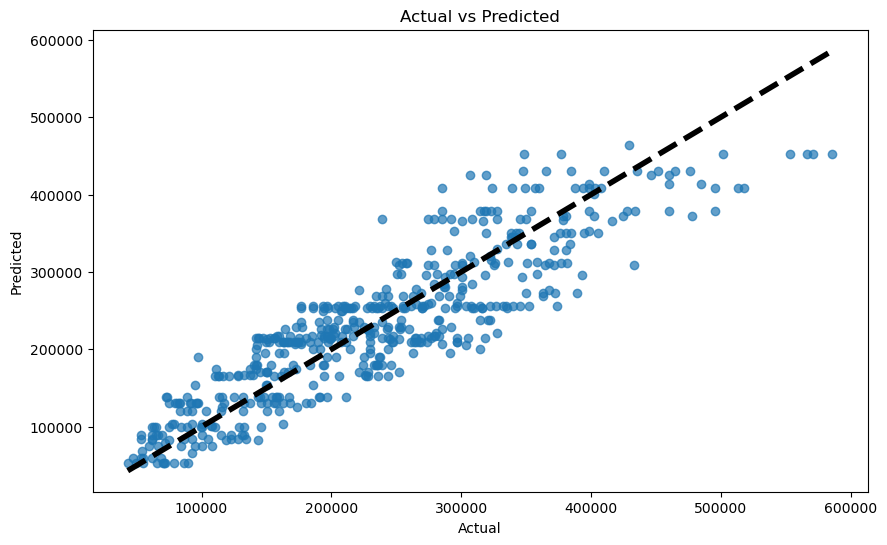

In [58]:
# Make predictions on the test data
y_pred = finalmodel.predict(x_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error (y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percetage Error (MAPE): {mape}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

**1. Mean Absolute Error (MAE): 38949.70**
<br>On average, the predicted apartment prices are off by approximately 38,949.70 korean won. This gives a straightforward measure of the prediction error.

**2. Mean Absolute Percentage Error (MAPE): 0.1918**
<br>On average, the predicted apartment prices differ from the actual prices by about 19.18%. This metric provides a sense of the error relative to the magnitude of the actual prices.

**3. Mean Squared Error (MSE): 2274061762.73**
<br>The MSE value is quite large, reflecting the squared nature of the error, which penalizes larger errors more than smaller ones.

**4. Root Mean Squared Error (RMSE): 47687.12**
<br>The RMSE of 47,687.12 won indicates the standard deviation of the prediction errors. 

**5. R-squared (R²): 0.7984**
<br>An R² value of 0.7984 means that approximately 80% of the variance in apartment prices is explained by the features in the model. This indicates a good fit, as the model captures a significant portion of the variability in the data.

My model appears to perform reasonably well, with a good fit indicated by the R² value. The errors in my model, reflected in metrics like MAE, MAPE, and RMSE, are influenced by the inherent variability and complexity of the apartment rental market. Understanding these factors helps contextualize why perfect predictions are challenging and why some level of error is normal and expected in this industry.

#### **4.4.2 Residual Analysis**

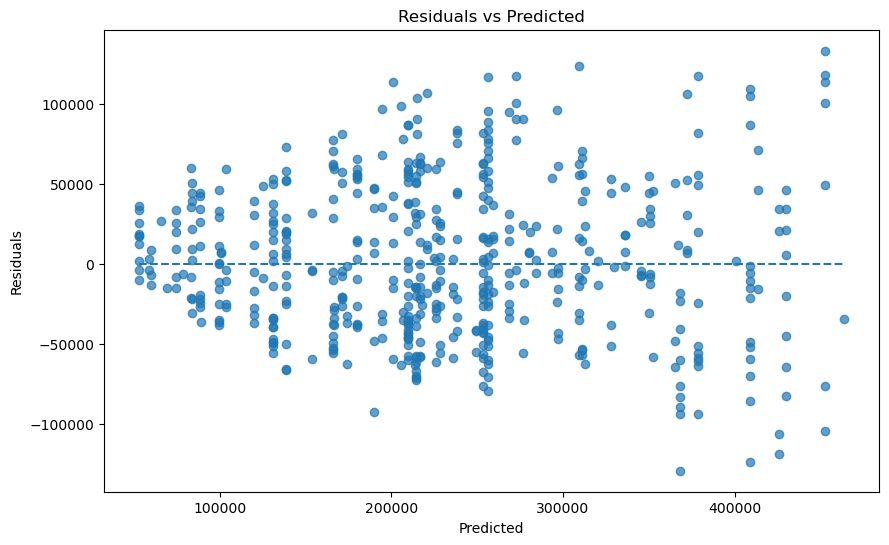

In [59]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

- The residuals are randomly distributed around zero, it suggests that the model captures the relationship between the features and the target variable well.
- There's no clear pattern but there are several points that far from the zero line, indicating that there are outliers in the prediction or large errors. This may require further investigation to understand the cause of the error.

Overall, the residual graph indicates that the regression model performs well, showing a good fit and no clear bias. However, the presence of significant outliers suggests that the model may struggle with some specific cases.

#### **4.4.3 Cross-Validation**

In [60]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(finalmodel, feature, target, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {cv_rmse_scores.mean()}")
print(f"Standard Deviation of Cross-Validation RMSE: {cv_rmse_scores.std()}")

Cross-Validation RMSE Scores: [46401.9921578  45925.84679626 46994.64980376 47700.52372289
 47498.70947307]
Mean Cross-Validation RMSE: 46904.344390754726
Standard Deviation of Cross-Validation RMSE: 664.0996545701333


- **1. Cross-Validation RMSE Scores:**
<br>The Root Mean Squared Error (RMSE) values obtained from cross-validation are as follows:
<br> Fold 1: 46,401.99 ; Fold 2: 45,925.85 ; Fold 3: 46,994.65 ; Fold 4: 47,700.52 ; Fold 5: 47,498.71 ;
<br>These scores reflect the model’s prediction error on different subsets of the data, providing an assessment of performance across various samples.

- **2. Mean Cross-Validation RMSE:** 
<br>The mean RMSE across all folds is 46,904.34. This average value indicates the typical prediction error of the model when applied to unseen data. A lower RMSE signifies better model performance, and this average value represents the model’s general effectiveness.

- **3. Standard Deviation of Cross-Validation RMSE:** 
<br>The standard deviation of the RMSE scores is 664.10. This measure of variability shows the extent of fluctuation in the model’s performance across different data subsets. A higher standard deviation suggests that the model’s prediction accuracy can vary depending on the specific subset of data used for validation.

The mean RMSE of 46,904.34 suggests that the model performs with a moderate level of accuracy on average. The variability in RMSE scores, with a standard deviation of 664.10, indicates that while the model is generally reliable, its performance can differ across different subsets of the data. This variability should be considered when evaluating the model’s overall effectiveness and robustness.



#### **4.4.4 Feature Importances**

<Axes: title={'center': 'Feature Importances'}>

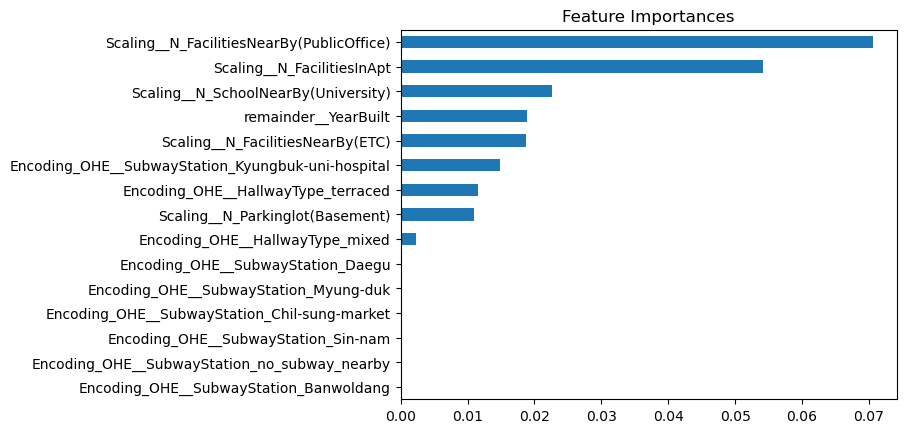

In [61]:
# Plot feature importances
feature_imp = pd.Series(finalmodel['model'].feature_importances_, pre_processing_transformer.get_feature_names_out()).sort_values().head(15)
feature_imp.plot(kind='barh', title='Feature Importances')

This feature importance graph (Feature Importance Plot) shows the relative contribution of each feature to the DecisionTreeRegressor predictive model. The following is an interpretation of the graph:

- **Nearest Facilities** 
<br>**N_FacilitiesNearBy (PublicOffice), N_SchoolNearBy(University) , N_FacilitiesNearBy(ETC) :**
<br>The presence of nearby public facilities and other facilities relatively have the significant contribution to the model. 

- **Facilities in the Apartment**
<br>**N_FacilitiesInApt**: 
<br>The number of facilities available in the apartment is the second largest contribution to model.

- **Age of Apartment** 
<br>**YearBuilt**: 
<br>Building age also has a significant contribution in the model, indicating that the age of apartment played a role in determining apartment price.

- **Hallway Type**
<br>**HallwayType_terrace and HallwayType_mixed**: 
<br>Hallway type, whether terrace or mixed, made a significant contribution to the model, indicating that this type of interior design is important in determining pricing.

From this graph, we can conclude that features related to property location are the most important in predicting property prices. This provides stakeholders in the real estate market with insight into what factors have the greatest influence on property values.

## **V. Conclusion**

**A. Final Model Prediction**
- The Decision Trees Regressor model has demonstrated an ability to understand and predict the real estate price dynamics in Daegu, considering factors such as property type, year built, and proximity to public facilities. Approximately 80% of the variance in apartment prices is explained by the features in the model.
- The Decision Trees Regressor was selected for its consistent performance and reliability in handling various data types. With MAPE score 19.18%, on average, the predicted apartment prices are off by approximately 38,949.70 korean won.


**B. Model Limitation**
- The model is specifically tailored to the Daegu Apartment Rental market. It's important to note that this model may not be directly applicable to other regions due to variations in local market conditions.
- The model trained exclusively on historical data. The model's predictions may not accurately reflect future market trends, especially during periods of rapid change or unforeseen events.
- The model might not consider real-time factors that can influence prices, such as seasonal variations, interest rate changes, or recent economic news.
- The dataset may not include subjective factors that affect property prices, such as how appealing the property looks or how good the neighborhood is.


## **VI. Recommendation**

**A. Data Management and Model Updates**
- Regularly updates data every year, ensure that the dataset used to train  model is regularly updated with new transaction data to maintain its accuracy and relevance.
- Maintain high data quality to ensure the model's predictions are reliable.
- Periodically retrain the model with the updated dataset to capture changes in market dynamics.

**B. Develop Model Integration**
- Develop or integrate an API that allows developers to access model's predictions programmatically. This enables seamless integration with existing systems and applications.
- Embed model into a web application or platform to provide real-time price estimations to users.

**C. Develop Customer Engagement Related Model**
- Develop a model that provide personalized property recommendations to potential tenant based on their preferences and budget.
- Use model to predict the optimal rental prices for properties that match the tenant's preferences.

**D. Business Strategy**
- Launched a marketing campaign that highlighted proximity to public facilities, its amnities to pricing. This aspect is most valuable to potential buyers, The company should focus on promoting this aspects of apartments that were most likely to attract buyers.

## **VII. Model Deployment**

In [62]:
import pickle

In [63]:
finalmodel.fit(feature,target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaling', RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)']),
                                                 ('Encoding_OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType',
                                                   'SubwayStation']),
                                                 ('Encoding_Ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': 0-5min                1
5min-10min            2
10min-15min           3
15min-20min           4
no_bus_stop_nearby    5
dtype: int64}]),
                                                  ['TimeToSubway'])])),
                ('scaler', RobustScaler()),
                ('model',
                 DecisionTreeRegressor(criterion='friedman_mse',
                                       max_features='sqrt', random_state=48))])

In [64]:
pickle.dump(finalmodel, open('Apartment_price_prediction_model.sav','wb'))

In [65]:
model_loaded = pickle.load(open('Apartment_price_prediction_model.sav','rb'))